# U.S. Medical Insurance Costs

# 1. Introduction

This project is part of a codecademy course I am taking. During this task I will perform research on medical insurance cost datatset that is from Kaggle website. The main purpose of this project is to use new skills that I've learned so far, which is Python fundamentals and csv library. But since I want to present my data in a nice way I will not limit myself and will use matplotlib, pandas seaborn and numpy for data visualization.

During this project I would like to investigate what factors are responisble for increasing medical insurance costs in the United States.

# 2. Explore data

Firstly, let's see what data do we have in insurance.csv file. As I wrote in Introduction section this dataset can be found on Kaggle website. The dataset includes data from 1138 patients. It is important to mention that all patients are from United States.
File consists of 7 columns, each representing different information about patient:
1. Age - age of patient presented as integer value,
2. Sex - sex of patient with values male or female,
3. BMI - patient's BMI value presented as float value
4. Children - the amount of children that patient has, presented as integer value
5. Somker - information if patient is smoker or not (boolean value - yes / no),
6. Region - region that patient is living in, string value
7. Charges - yearly value of patient's medical insurance cost.

Additionally the file has no missing data. Each category has correct values. There are no typos or issues with data. The dataset is clean and I can start exploring it.

## 2.1 Basic setup of data

Before I start data analysis I need to import all necessary libraries that I will be using during this project. Since this is my first project and for now I've been learning only basic stuff such as Python and csv library I will use them here a lot. But it doesn't mean that I will not use something beyond project requirements - for visualization I will try to use libraries that I haven't learn so far during this course.

In [32]:
# import necessary libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Now, I have to import data from insurance.csv file. To make it easier to investigate I will store values from each column in separated list. 

In [2]:
#create empty lists that will store values from each column
ages = []
sexes = []
bmis = []
children_amount = []
smoker_statuses = []
regions = []
insurance_costs = []

To load data from insurance.csv file into each of the list above I need to create a function that will take care of this. The main purpose of this function will be to get 3 parameters:
1. csv_file - dataset from which I will get the data,
2. column_name - column name from csv file that stores values,
3. new_list - list to which each value from certain column will be appended,

In [3]:
type_converters = {
    "integer": int,
    "float": float,
    "string": str
}

def load_data_from_list(column_name, value_type):
    with open('insurance.csv') as csv_file:
        new_list = []
        file_dict = csv.DictReader(csv_file)
        for row in file_dict:
            value = row[column_name]
            converted_value = type_converters[value_type](value)
            new_list.append(converted_value)
        return new_list

In [4]:
# invoke load_data_from_list() and assign values from csv file into separate lists
ages = load_data_from_list('age', 'integer')
sexes = load_data_from_list('sex', 'string')
bmis = load_data_from_list('bmi', 'float')
children_amount = load_data_from_list('children', 'integer')
smoker_statuses = load_data_from_list('smoker', 'string')
regions = load_data_from_list('region', 'string')
insurance_costs = load_data_from_list('charges', 'float')

The data has been grouped by 1 of the 7 categories (meaning by each column from csv file). Now I can check what is the total amount of patients, which will help me later to calculate the average values. To get that information I will create function that will return value and store it in variable called patients_amount.

In [5]:
# function that counts amount of rows in insurance.csv file, while each row represents single patient
def get_total_patients_amount():
    total_count = 0
    with open('insurance.csv') as csv_file:
        file_dict = csv.DictReader(csv_file)
        for row in file_dict:
            total_count += 1
        return total_count

In [6]:
patients_amount = get_total_patients_amount()
print("The total number of patients is: " + str(patients_amount))

The total number of patients is: 1338


## 2.1 Check if dataset is representative

Now it's time to check if dataset is representative among population.
To do that I will check:
1. check the average age of a patient (sprawdzić czy tak to powinno być napisane)
2. if the amount between female and male patients are equal? (equal czy bardziej że jest zbliżona do siebie?)
3. if the amount of patients from each region is similar?

### 2.1.1 Check the average age of a patient

The average age of a patient is the first thing that has to be checked. This information is important because based on it I can see if the dataset has wide range of patient's age. If the dataset would have only range between patients that are 20-30 years old it wouldn't be representative because other groups of patients with different ages would be left over. That would lead me to get wrong conclusions from analysis and even more to make wrong business decisions based on that data.

To get the average age of a patient I will create function called get_average_age().

In [7]:
# function that returns information about average age of a patient from dataset
def get_average_age():
    total_age = 0
    for age in ages:
        total_age += int(age)
    return round(total_age/len(ages), 2)

In [8]:
average_age = get_average_age()
print("Average patient age: " + str(average_age) + " years.")

Average patient age: 39.21 years.


To see how age of patients is distributed I will create histogram using matplotlib.

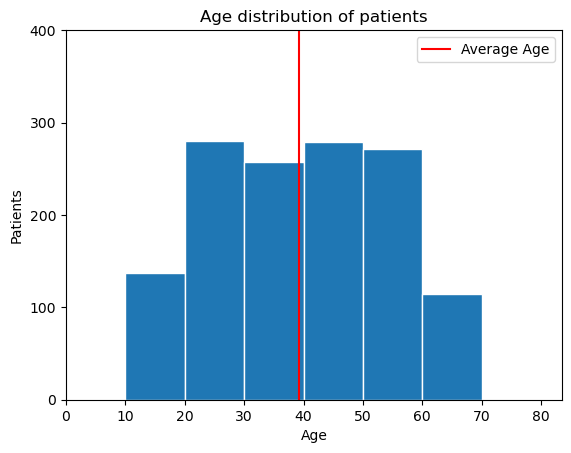

In [9]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]

plt.hist(ages, bins = bins, edgecolor='white')
plt.axvline(average_age, color='red', label="Average Age")
plt.xlabel("Age")
plt.ylabel("Patients")
plt.title("Age distribution of patients")

ax = plt.subplot()
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticks([0, 100, 200, 300, 400])

plt.legend()
plt.show()

The above histogram shows that the age is evenly distributed throughout the entire range. Furthermore the average age data is placed almost in the middle of histogram which proves that the patients' age data is representative.

### 2.1.2 Check the amount of male and female patients

Another aspect to check is percentage of male vs female patients in dataset. To check this I will write functions that will calculate the amount of patients per sex. Having that information I will be able to get percentage values and present it on pie chart.

In [10]:
# function that returns amount of patients per sex
def get_patients_amount_per_sex(patient_sex):
    counter = 0
    for sex in sexes:
        if sex == patient_sex:
            counter += 1
        else:
            continue
    return counter

In [11]:
# store amount of patients per sex in dedicated variables
females_amount = get_patients_amount_per_sex('female')
males_amount = get_patients_amount_per_sex('male')

print("Female patients amount: " + str(females_amount))
print("Male patients amount: " + str(males_amount))

Female patients amount: 662
Male patients amount: 676


([<matplotlib.patches.Wedge at 0x201bf8d16d0>,
 [Text(0.01807856899700512, 1.0998514287589123, 'Females'),
  Text(-0.018078568997005745, -1.0998514287589123, 'Males')],
 [Text(0.009861037634730065, 0.5999189611412249, '49.5%'),
  Text(-0.009861037634730405, -0.5999189611412248, '50.5%')])

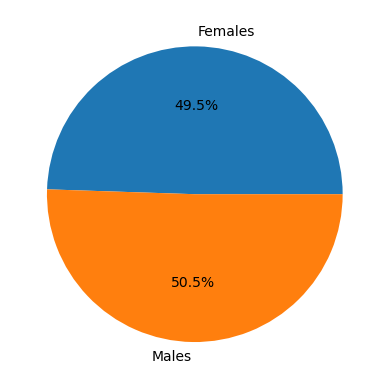

In [12]:
# setting data for pie chart
labels = 'Females', 'Males'
sizes = [females_amount, males_amount]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

On the above pie chart we can see that there are 50,5% of male patients and 49,5% of female patients. The difference between sexes is only 1% which means that the dataset is representative when it comes to patients' sex.

### 2.1.3 Check the amount of patients from each region

Last thing that I will check is the distribution of patients from perspective of patients' regions. To check that I will write function that will return all available regions that are in dataset.

In [13]:
def get_regions():
    all_regions = []
    for region in regions:
        if region not in all_regions:
            all_regions.append(region)
    return all_regions

In [14]:
patients_regions = get_regions()
print("There are " + str(len(patients_regions)) + " regions in dataset:")
print(patients_regions)

There are 4 regions in dataset:
['southwest', 'southeast', 'northwest', 'northeast']


Now let's calculate how many patients are from each region.

In [15]:
# function that returns amount of patients per region
def get_patients_amount_per_region(patient_region):
    counter = 0
    for region in regions:
        if region == patient_region:
            counter += 1
        else:
            continue
    return counter

In [16]:
# store amount of patients per regions in dedicated variables
southwest_patients_amount = get_patients_amount_per_region('southwest')
southeast_patients_amount = get_patients_amount_per_region('southeast')
northwest_patients_amount = get_patients_amount_per_region('northwest')
northeast_patients_amount = get_patients_amount_per_region('northeast')

print("Southwest patients amount: " + str(southwest_patients_amount))
print("Southeast patients amount: " + str(southeast_patients_amount))
print("Northwest patients amount: " + str(northwest_patients_amount))
print("Northeast patients amount: " + str(northeast_patients_amount))

Southwest patients amount: 325
Southeast patients amount: 364
Northwest patients amount: 325
Northeast patients amount: 324


There are slightly more patients from Southeast region comparing to other regions. Let's check how it will present on pie chart with percentage values.

([<matplotlib.patches.Wedge at 0x201bf928df0>,
 [Text(0.7949723523462666, 0.7602755809606433, 'Southwest'),
  Text(-0.7967552295083369, 0.7584069516104911, 'Southeast'),
  Text(-0.7201694244483215, -0.8314782018127556, 'Northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'Northeast')],
 [Text(0.43362128309796355, 0.4146957714330781, '24.3%'),
  Text(-0.4345937615500019, 0.4136765190602678, '27.2%'),
  Text(-0.3928196860627208, -0.45353356462513933, '24.3%'),
  Text(0.4345937421844059, -0.41367653940506965, '24.2%')])

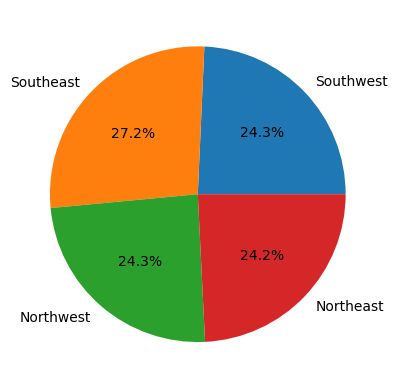

In [17]:
# setting data for pie chart
labels = 'Southwest', 'Southeast', 'Northwest', 'Northeast'
sizes = [southwest_patients_amount, southeast_patients_amount, northwest_patients_amount, northeast_patients_amount]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

Comparing percentage values we can see that the least amount of patients are from Northeast, next there are patients from Northwest and Southwest. The most patients are from Southeast - by 2,7%. Based on that information I can say, that the amount of patients per each region is representative.

## 3. Perform data analysis for medical insurance cost

Knowing that our dataset has representative values I can start analyzing it. As a reminder the goal of this project is to check which factor impacts the most of increasing medical insurance cost for patients.
In insurance.csv file there are 6 factors that I will check during this analysis:
1. Patient's age
2. Patient's BMI value
3. Patient's amount of children
4. Patient's smoking status
5. Patient's region

The easiest way of checking what factor contributes most strongly to low and/or high medical insurance charges is to perform correlation analysis. To do this I need to load insurance.csv file into a data frame by using pandas library.

In [54]:
# load csv file into data frame 
df = pd.read_csv('insurance.csv')

In [55]:
# calling head() function to see first rows of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To check correlation I need to convert categorical variables into numerical. Other way they would be omitted by library. There are 3 columns that stores categorical variables - sex, smoker and region.

Knowing which columns stores categorical variables, let's see how they will be changed:
1. column "sex":
    - female: 0
    - male: 1
2. column "smoker":
    - no: 0
    - yes: 1
3. column "region":
    - northeast: 0
    - northwest: 1
    - southeast: 2
    - southwest: 3


In [56]:
# replacing values
df['sex'].replace(['female', 'male'], [0, 1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0, 1], inplace=True)
df['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace=True)

In [57]:
# call head() function to check if values have been replaced correctly
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Now we have all values stored in numerical variables and I can check what is the correlation between those data.

In [58]:
cormat = df.corr()
round(cormat,2)

,age,sex,bmi,children,smoker,region,charges
age,1.00,-0.02,0.11,0.04,-0.03,0.00,0.30
sex,-0.02,1.00,0.05,0.02,0.08,0.00,0.06
bmi,0.11,0.05,1.00,0.01,0.00,0.16,0.20
children,0.04,0.02,0.01,1.00,0.01,0.02,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,-0.00,0.79
region,0.00,0.00,0.16,0.02,-0.00,1.00,-0.01
charges,0.30,0.06,0.20,0.07,0.79,-0.01,1.00


To present above correlation in a nice way I will use plot called 'heatmap' from seaborn library.

<AxesSubplot:>

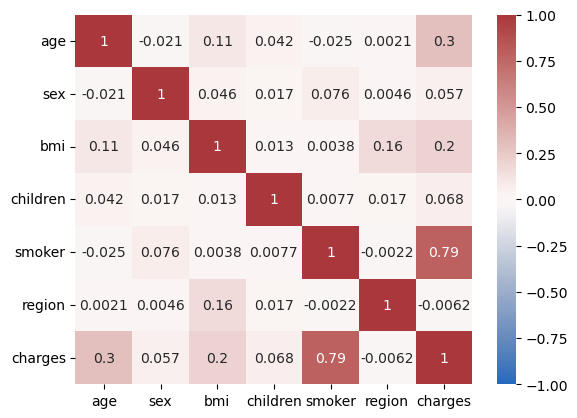

In [59]:
# load correlated data into plot to visualize the correlation between data
sns.heatmap(cormat, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag')

The above plot is not ideal. You can see that there are multiple repated values which makes it hard to read. Let's clean this plot by adding mask on it.

In [60]:
# create mask for heatmap plot
matrix = round(cormat, 2)
mask = np.triu(np.ones_like(matrix, dtype = bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

<AxesSubplot:>

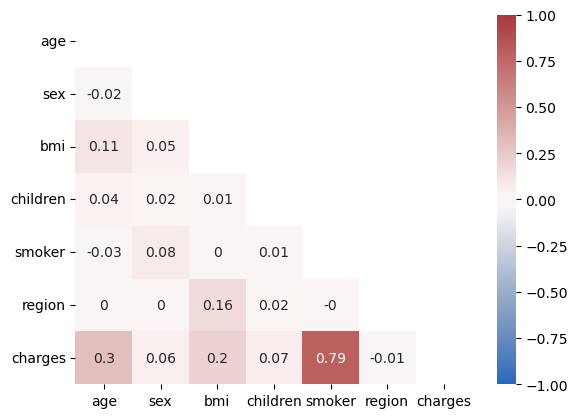

In [61]:
# load again correlated data into plot and use mask to eliminate duplicated values
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag', mask=mask)

Above plot gives us very important information. It shows that smoking status impacts the most of how high the medical insurance cost is. The correlation between smoker and charges variables are very strong.
The next factor is age, but on the color of the chart we can see that the correlation is not so strong as it is with smoking status. After age there is BMI but comparing it to smkoking status the BMI values is 4 times less important for medical insurance companies.

Now let's check at least affects the cost of medical insurance. The first thing is region with negative correlation value. Then we have sex and amount of children. 

Since we know what has the greatest impact on the increased annual costs of medical insurance the last thing I would like to check is the average cost of medical insurance for smoking and non-smkoking patients.

In [62]:
# calculate average insurance cost for all patients from dataset
def get_average_insurance_cost():
    total_costs = 0
    for cost in insurance_costs:
        total_costs += cost
    return round(total_costs/len(ages), 2)

In [63]:
average_insurance_cost = get_average_insurance_cost()
print("The average insurance cost for U.S. patient per year is: " + str(average_insurance_cost) + " dollars.")

The average insurance cost for U.S. patient per year is: 13270.42 dollars.


In [72]:
# calculate average insurance cost by smoking status
def get_average_insurance_cost_per_smoker_status():
    smokers = 0
    smokers_insurance_costs = 0
    non_smokers = 0
    non_smokers_insurance_costs = 0
    with open('insurance.csv') as csv_file:
        file_dict = csv.DictReader(csv_file)
        for row in file_dict:
            if row['smoker'] == 'yes':
                smokers += 1
                smokers_insurance_costs += float(row['charges'])
            else:
                non_smokers += 1
                non_smokers_insurance_costs += float(row['charges'])
    smoker_average_insurance_cost = round(smokers_insurance_costs/smokers, 2)
    non_smoker_average_insurance_cost = round(non_smokers_insurance_costs/non_smokers, 2)
    insurance_costs_diff = smoker_average_insurance_cost - non_smoker_average_insurance_cost
    print("Average insurance cost of smokers: " + str(smoker_average_insurance_cost))
    print("Average insurance cost of non-smokers: " + str(non_smoker_average_insurance_cost))
    print("The difference between insurance costs for smokers and non-smokers is: " + str(insurance_costs_diff))

In [73]:
get_average_insurance_cost_per_smoker_status()

Average insurance cost of smokers: 32050.23
Average insurance cost of non-smokers: 8434.27
The difference between insurance costs for smokers and non-smokers is: 23615.96


We can see that the average insurance costs for all patients is 13270.42 while the average insurance costs for smoking patients is 32050.23. It's 2,4 times more per year. 

## 4. Conclusion

The conducted data analysis proves that taking care of yourself is an important factor taken into account when calculating the cost of medical insurance in United States. Especially when it comes to smoking, which affects the annual medical insurance costs the most. I must admit that it's understandable.

According to WHO "Tobacco kills more than 8 million people each year". 

Additionally on the CDC's website (Centers for Disease Control and Prevention - one of the major operating components of the Department of Health and Human Services in America) we can read that:
"Smoking leads to disease and disability and harms nearly every organ of the body.
More than 16 million Americans are living with a disease caused by smoking. For every person who dies because of smoking, at least 30 people live with a serious smoking-related illness. Smoking causes cancer, heart disease, stroke, lung diseases, diabetes, and chronic obstructive pulmonary disease (COPD), which includes emphysema and chronic bronchitis. Smoking also increases risk for tuberculosis, certain eye diseases, and problems of the immune system, including rheumatoid arthritis."
